<a href="https://colab.research.google.com/github/Tejaswini-Gsl/neural-networks/blob/main/ICP_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from keras.layers import Input, Dense
from keras.models import Model


In [24]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
hidden_Layer = Dense(128, activation='relu')(input_img)
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# hidden_Layer = Dense(128, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy',metrics=['accuracy'])



In [25]:
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
encoder = Model(input_img, encoded)
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [26]:
from keras.datasets import mnist, fashion_mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

history= autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/5
235/235 [==============================] - 2s 6ms/step - loss: 0.6946 - accuracy: 0.0012 - val_loss: 0.6944 - val_accuracy: 0.0021
Epoch 2/5
235/235 [==============================] - 1s 5ms/step - loss: 0.6943 - accuracy: 0.0012 - val_loss: 0.6941 - val_accuracy: 0.0021
Epoch 3/5
235/235 [==============================] - 1s 5ms/step - loss: 0.6940 - accuracy: 0.0013 - val_loss: 0.6938 - val_accuracy: 0.0021
Epoch 4/5
235/235 [==============================] - 1s 5ms/step - loss: 0.6937 - accuracy: 0.0013 - val_loss: 0.6936 - val_accuracy: 0.0021
Epoch 5/5
235/235 [==============================] - 1s 5ms/step - loss: 0.6934 - accuracy: 0.0013 - val_loss: 0.6933 - val_accuracy: 0.0021


313/313 [==============================] - 0s 1ms/step


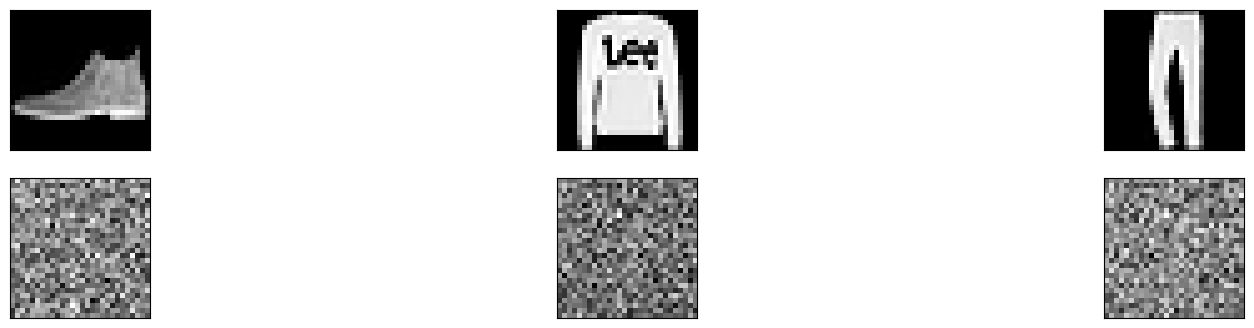

In [13]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

import matplotlib.pyplot as plt

n = 3
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

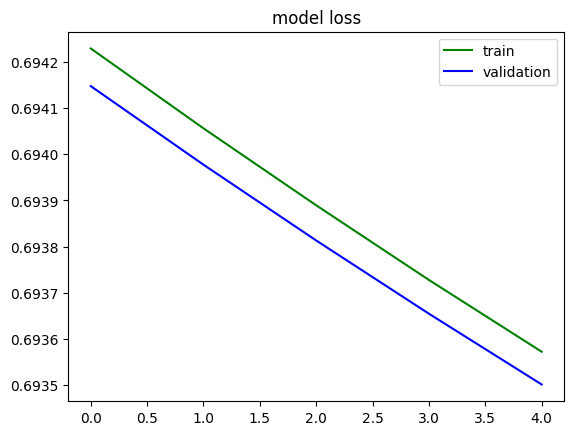

In [14]:
plt.plot(history.history['loss'], color="green")
plt.plot(history.history['val_loss'], color="blue")
plt.title('model loss')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

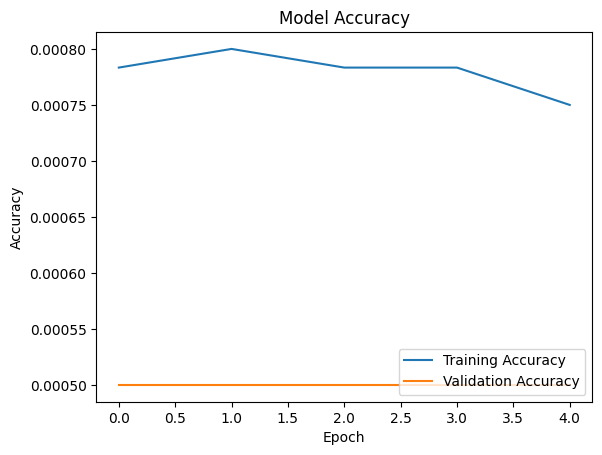

In [15]:
# Plotting the accuracy if you have 'accuracy' in your metrics
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()


On de-noisening autoencoder

In [9]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
hidden_Layer = Dense(128, activation='relu')(input_img)
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
# hidden_Layer = Dense(128, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])
from keras.datasets import fashion_mnist
import numpy as np
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

#introducing noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

history2= autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_noisy))


Epoch 1/10
235/235 [==============================] - 2s 6ms/step - loss: 0.6963 - accuracy: 0.0021 - val_loss: 0.6962 - val_accuracy: 0.0022
Epoch 2/10
235/235 [==============================] - 1s 5ms/step - loss: 0.6960 - accuracy: 0.0021 - val_loss: 0.6959 - val_accuracy: 0.0022
Epoch 3/10
235/235 [==============================] - 1s 5ms/step - loss: 0.6958 - accuracy: 0.0021 - val_loss: 0.6957 - val_accuracy: 0.0023
Epoch 4/10
235/235 [==============================] - 1s 5ms/step - loss: 0.6956 - accuracy: 0.0021 - val_loss: 0.6955 - val_accuracy: 0.0023
Epoch 5/10
235/235 [==============================] - 1s 6ms/step - loss: 0.6953 - accuracy: 0.0021 - val_loss: 0.6952 - val_accuracy: 0.0023
Epoch 6/10
235/235 [==============================] - 2s 6ms/step - loss: 0.6951 - accuracy: 0.0022 - val_loss: 0.6950 - val_accuracy: 0.0022
Epoch 7/10
235/235 [==============================] - 1s 5ms/step - loss: 0.6949 - accuracy: 0.0021 - val_loss: 0.6948 - val_accuracy: 0.0022
Epoch 

In [43]:
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
encoder = Model(input_img, encoded)
decoder = Model(encoded_input, decoder_layer(encoded_input))

313/313 [==============================] - 0s 1ms/step


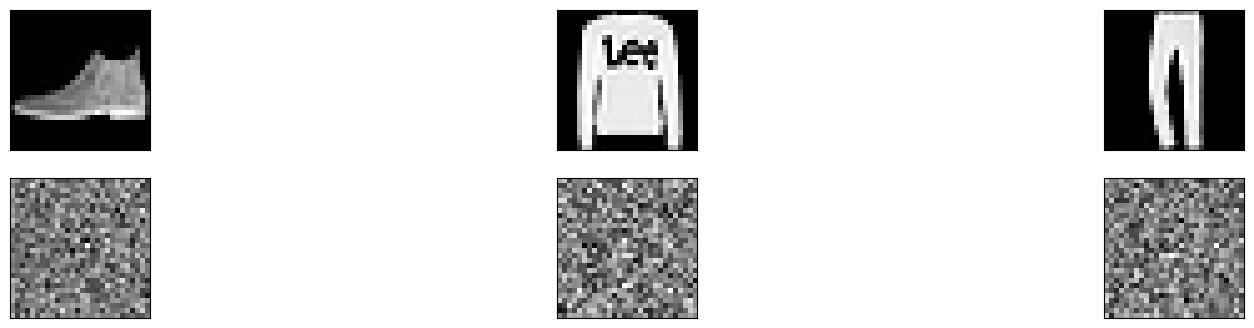

In [44]:
encoded_imgs = encoder.predict(x_test_noisy)
decoded_imgs = decoder.predict(encoded_imgs)

import matplotlib.pyplot as plt

n = 3
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

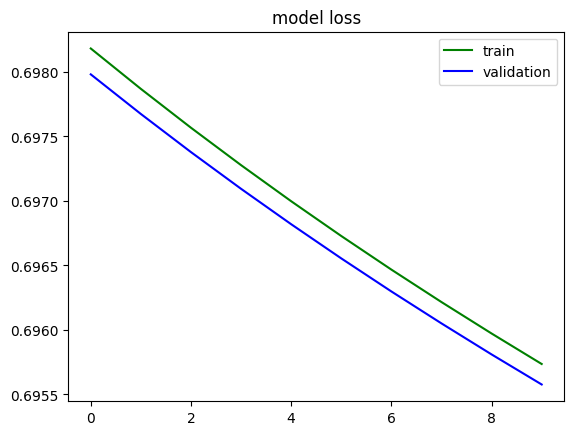

In [45]:
plt.plot(history2.history['loss'], color="green")
plt.plot(history2.history['val_loss'], color="blue")
plt.title('model loss')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

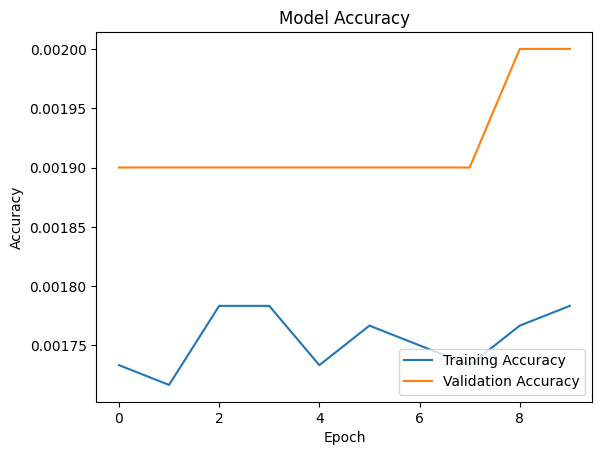

In [46]:
# Plotting the accuracy if you have 'accuracy' in your metrics
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()
